# The Genius Star

In [1]:
from genius_star import Game, Dice, Pieces, Board

## Example solution

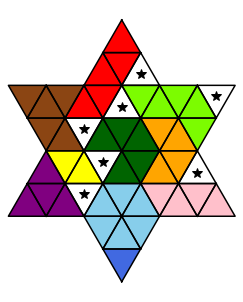

In [2]:
roll = [4, 10, 15, 18, 28, 33, 37]
game = Game(roll)
solution = game.solve()
solution.plot()

## Game Description
[The Genius Star](https://www.happypuzzle.co.uk/word-maths-and-shape-games/the-genius-star) is a puzzle game made by the Happy Puzzle Company. It is played on a star-shaped board of triangles.

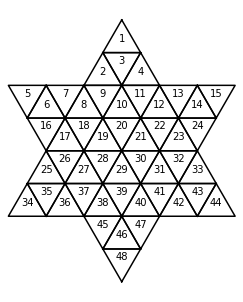

In [3]:
Board().plot()

The player rolls a set of seven dice, whose numbers correspond to triangles on the board. These triangles are "blocked" by the white pieces with a star.

In [4]:
Dice().roll()

[11, 15, 18, 25, 27, 29, 41]

The player must then fit the remaining irregular shaped pieces on the board, completely tiling the board. The game always has a solution.

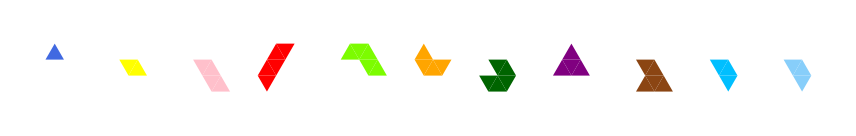

In [5]:
Pieces().plot()

The two length-3 pieces can be combined to form a hexagon called "the golden star". It is an extra challenge to find a tiling which has the hexagon, but only 58.7% of games have this possibility. 

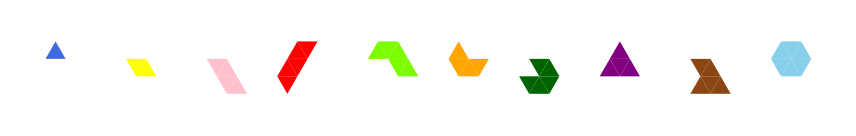

In [6]:
Pieces(star=True).plot()

## Solver algorithm
The solver works by casting the tiling problem as an [exact cover problem](https://en.wikipedia.org/wiki/Exact_cover), and then calling a [python package](https://github.com/jwg4/exact_cover) which solves such problems.

Internally the triangles of the board and pieces are described using [triangular grid coordinates](https://www.boristhebrave.com/2021/05/23/triangle-grids/) where each triangle is referred to by triplet of three integers. The code first works out every possible position and orientation each individual piece can be placed on the board. It then constructs the incidence matrix, which is a matrix of 1s and 0s. Each row of the matrix corresponds to placing a particular piece in a particular orientation and particular position on the board. The first 41 columns of the matrix represent the 41 free triangles on the board; a 1 in a particular column means the piece covers that triangle on the board. The final 11 (no-star game) or 10 (star game) columns represent the individual pieces, a 1 in that column means that particular piece is used.

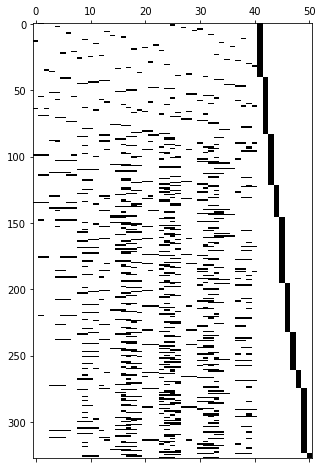

In [7]:
roll = [4, 10, 15, 18, 28, 33, 37]
game = Game(roll)
game.plot_matrix()

The solver always first tries to find a solution with a star (hexagon). If that fails, it finds a solution without. 

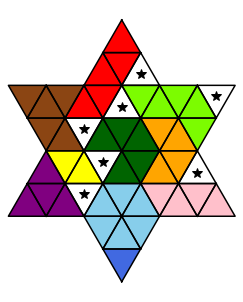

In [8]:
game.solve().plot()